In [26]:
# Importing Pandas
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Reading csv as dataframe
g20_index_data = pd.read_csv("UNION.csv")
g20_covid = pd.read_csv("g20_covid.csv")
g20_index_data.head()
g20_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARG,South America,Argentina,2020-01-01 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
1,ARG,South America,Argentina,2020-01-02 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
2,ARG,South America,Argentina,2020-01-03 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
3,ARG,South America,Argentina,2020-01-04 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
4,ARG,South America,Argentina,2020-01-05 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0


In [27]:
g20_index_data['USD'] = g20_index_data['USD'].replace(0, None)

g20_index_data.isna().sum()

date          0
Country       0
USD        2198
dtype: int64

In [28]:
g20_index_data.ffill(inplace=True)

g20_index_data.head(10)

,date,Country,USD
0,2018-01-01,Argentina,NaN
1,2018-01-02,Argentina,1671.991824
2,2018-01-03,Argentina,1711.535940
3,2018-01-04,Argentina,1732.425964
4,2018-01-05,Argentina,1729.343505
5,2018-01-06,Argentina,1729.343505
6,2018-01-07,Argentina,1729.343505
7,2018-01-08,Argentina,1741.454487
8,2018-01-09,Argentina,1688.416076
9,2018-01-10,Argentina,1670.292534


In [29]:
index_2020 = g20_index_data.loc[(g20_index_data['date'] >= "2020-01-01") & (g20_index_data['date'] <= "2020-12-31")]
index_2020['date'] =  pd.to_datetime(index_2020['date'], infer_datetime_format=True)
index_2020["week"] = index_2020["date"].dt.isocalendar().week
index_2020_week =  index_2020.groupby(["Country", "week"],as_index=False).mean()

C:\Users\kanen\AppData\Local\Temp\ipykernel_13924\667688445.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kanen\AppData\Local\Temp\ipykernel_13924\667688445.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Weekly Average of G20 Financial Markets in 2020

In [30]:
fig = px.choropleth(index_2020_week, locations='Country',locationmode = "country names", color="USD",range_color=(0, 15000), color_continuous_scale="YlGnBu", animation_frame="week")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Conclusion:** I guess it shows the volatilty in some of the G20 markets while others stayed somewhat steady. Turkey got destroyed 

##### Same Data but in Line Graph Form:

<AxesSubplot:xlabel='week', ylabel='USD'>

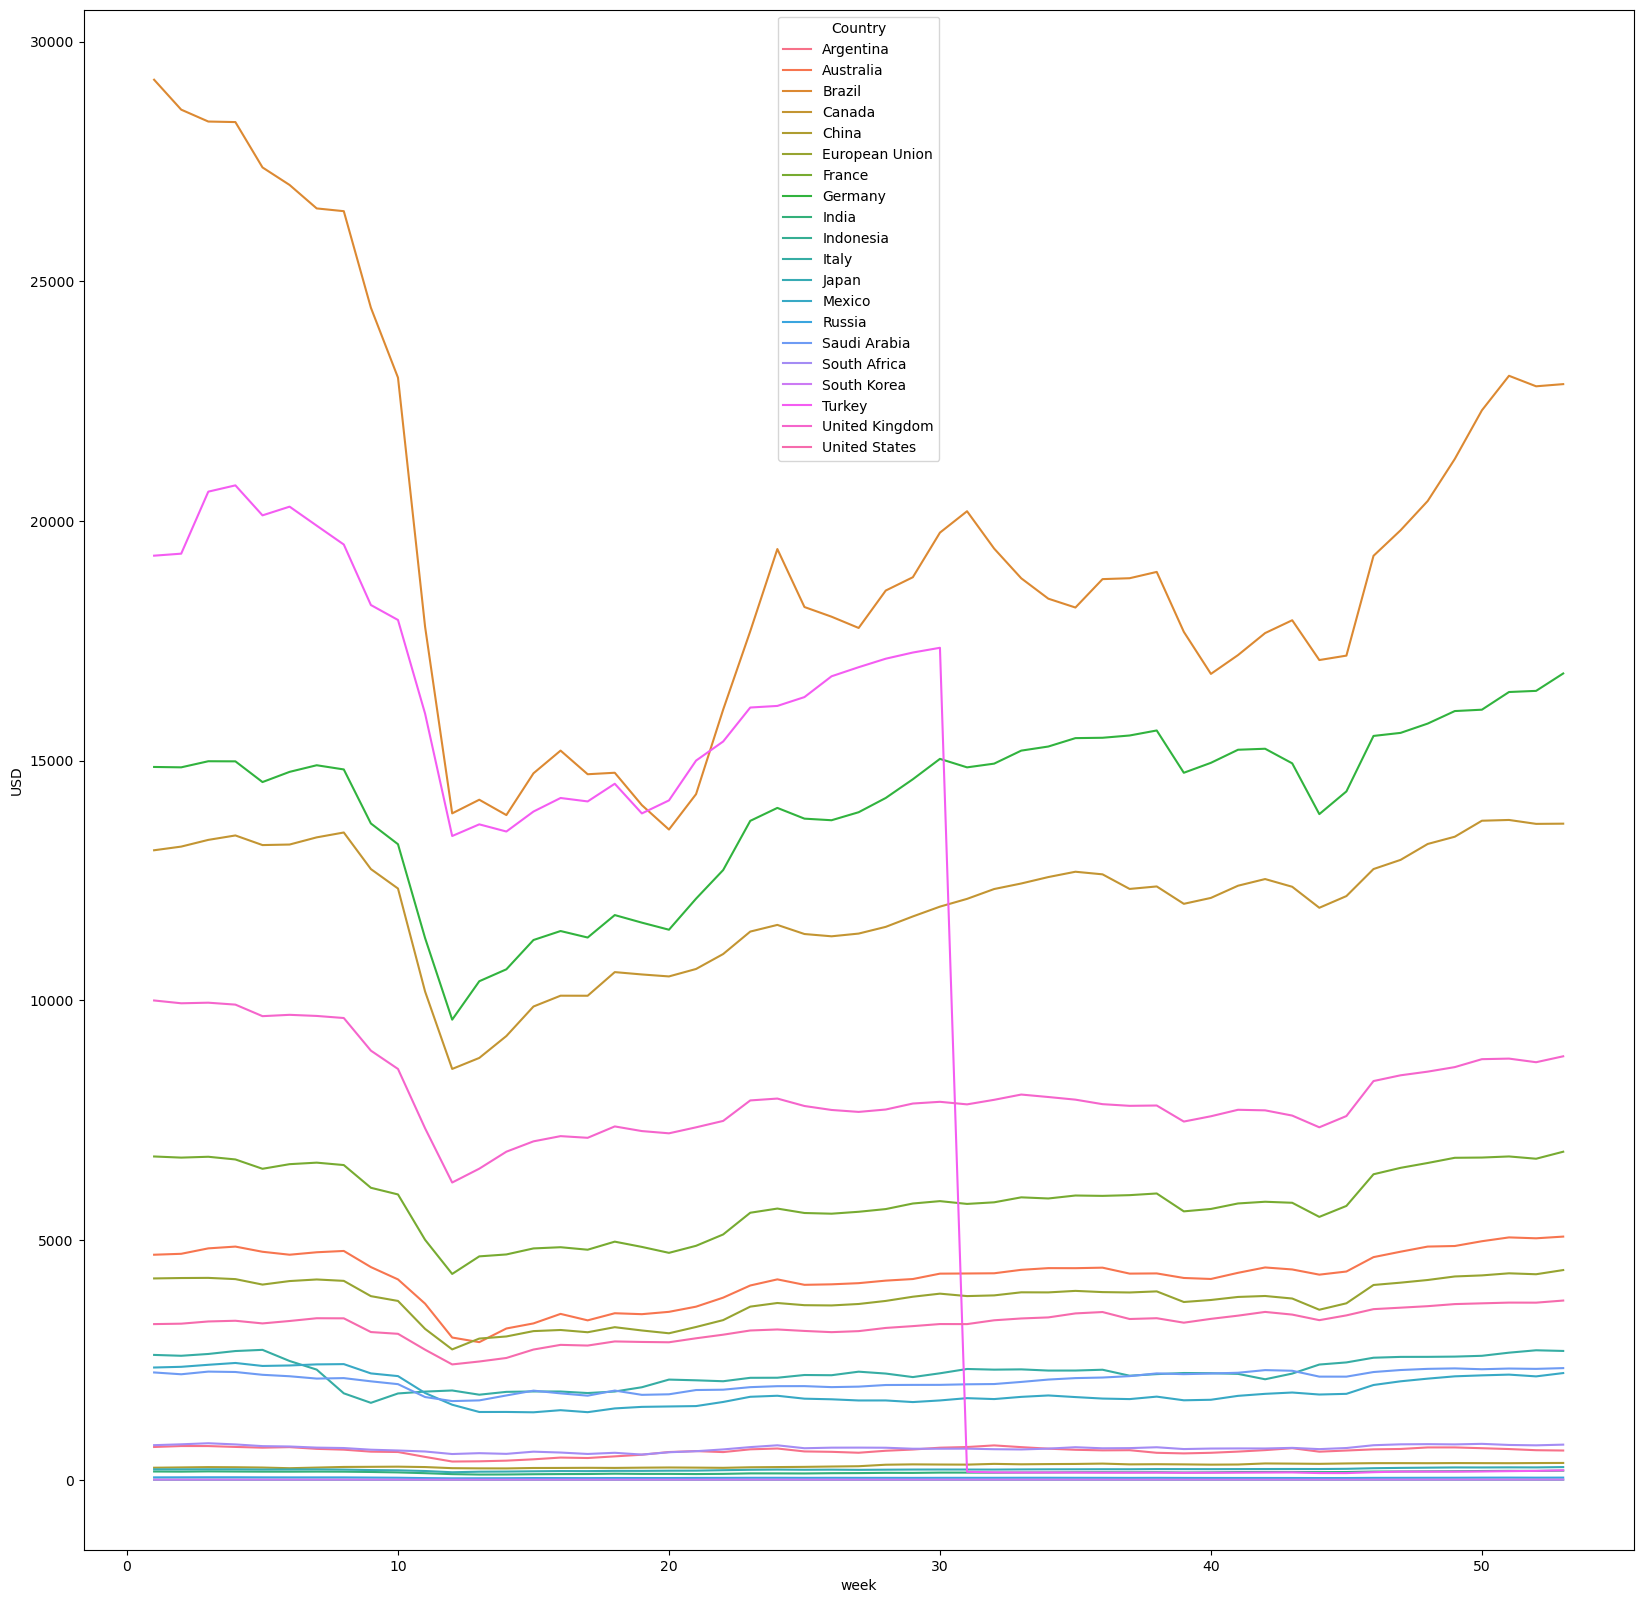

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.lineplot(x = index_2020_week["week"], y= index_2020_week["USD"], hue = index_2020_week["Country"], ci=None)

In [32]:
display(g20_covid)
g20_index_data.columns.values

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARG,South America,Argentina,2020-01-01 0:00,0,0,0.000,0,0,0.000,...,27.7,0.0,5.00,76.67,0.845,45276780,0.0,0.0,0.0,0.0
1,ARG,South America,Argentina,2020-01-02 0:00,0,0,0.000,0,0,0.000,...,27.7,0.0,5.00,76.67,0.845,45276780,0.0,0.0,0.0,0.0
2,ARG,South America,Argentina,2020-01-03 0:00,0,0,0.000,0,0,0.000,...,27.7,0.0,5.00,76.67,0.845,45276780,0.0,0.0,0.0,0.0
3,ARG,South America,Argentina,2020-01-04 0:00,0,0,0.000,0,0,0.000,...,27.7,0.0,5.00,76.67,0.845,45276780,0.0,0.0,0.0,0.0
4,ARG,South America,Argentina,2020-01-05 0:00,0,0,0.000,0,0,0.000,...,27.7,0.0,5.00,76.67,0.845,45276780,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,USA,North America,United States,2022-10-22 0:00,97195886,5316,37034.429,1067742,12,375.857,...,24.6,0.0,2.77,78.86,0.926,336997624,0.0,0.0,0.0,0.0
19991,USA,North America,United States,2022-10-23 0:00,97203986,8100,37241.571,1067743,1,375.429,...,24.6,0.0,2.77,78.86,0.926,336997624,0.0,0.0,0.0,0.0
19992,USA,North America,United States,2022-10-24 0:00,97244825,40839,37543.857,1067939,196,357.571,...,24.6,0.0,2.77,78.86,0.926,336997624,0.0,0.0,0.0,0.0
19993,USA,North America,United States,2022-10-25 0:00,97273529,28704,35437.857,1068354,415,356.143,...,24.6,0.0,2.77,78.86,0.926,336997624,0.0,0.0,0.0,0.0


array(['date', 'Country', 'USD'], dtype=object)

In [33]:
g20_covid_subset = g20_covid[["date","location", "new_cases", "new_deaths", "new_tests", "new_vaccinations"]]
g20_index_subset = g20_index_data[["date", "USD"]]
g20_covid_subset['date'] =  pd.to_datetime(g20_covid_subset['date'], infer_datetime_format=True)
g20_index_subset['date'] =  pd.to_datetime(g20_index_subset['date'], infer_datetime_format=True)

C:\Users\kanen\AppData\Local\Temp\ipykernel_13924\893411756.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kanen\AppData\Local\Temp\ipykernel_13924\893411756.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### Correlation Heatmap for all Countries 

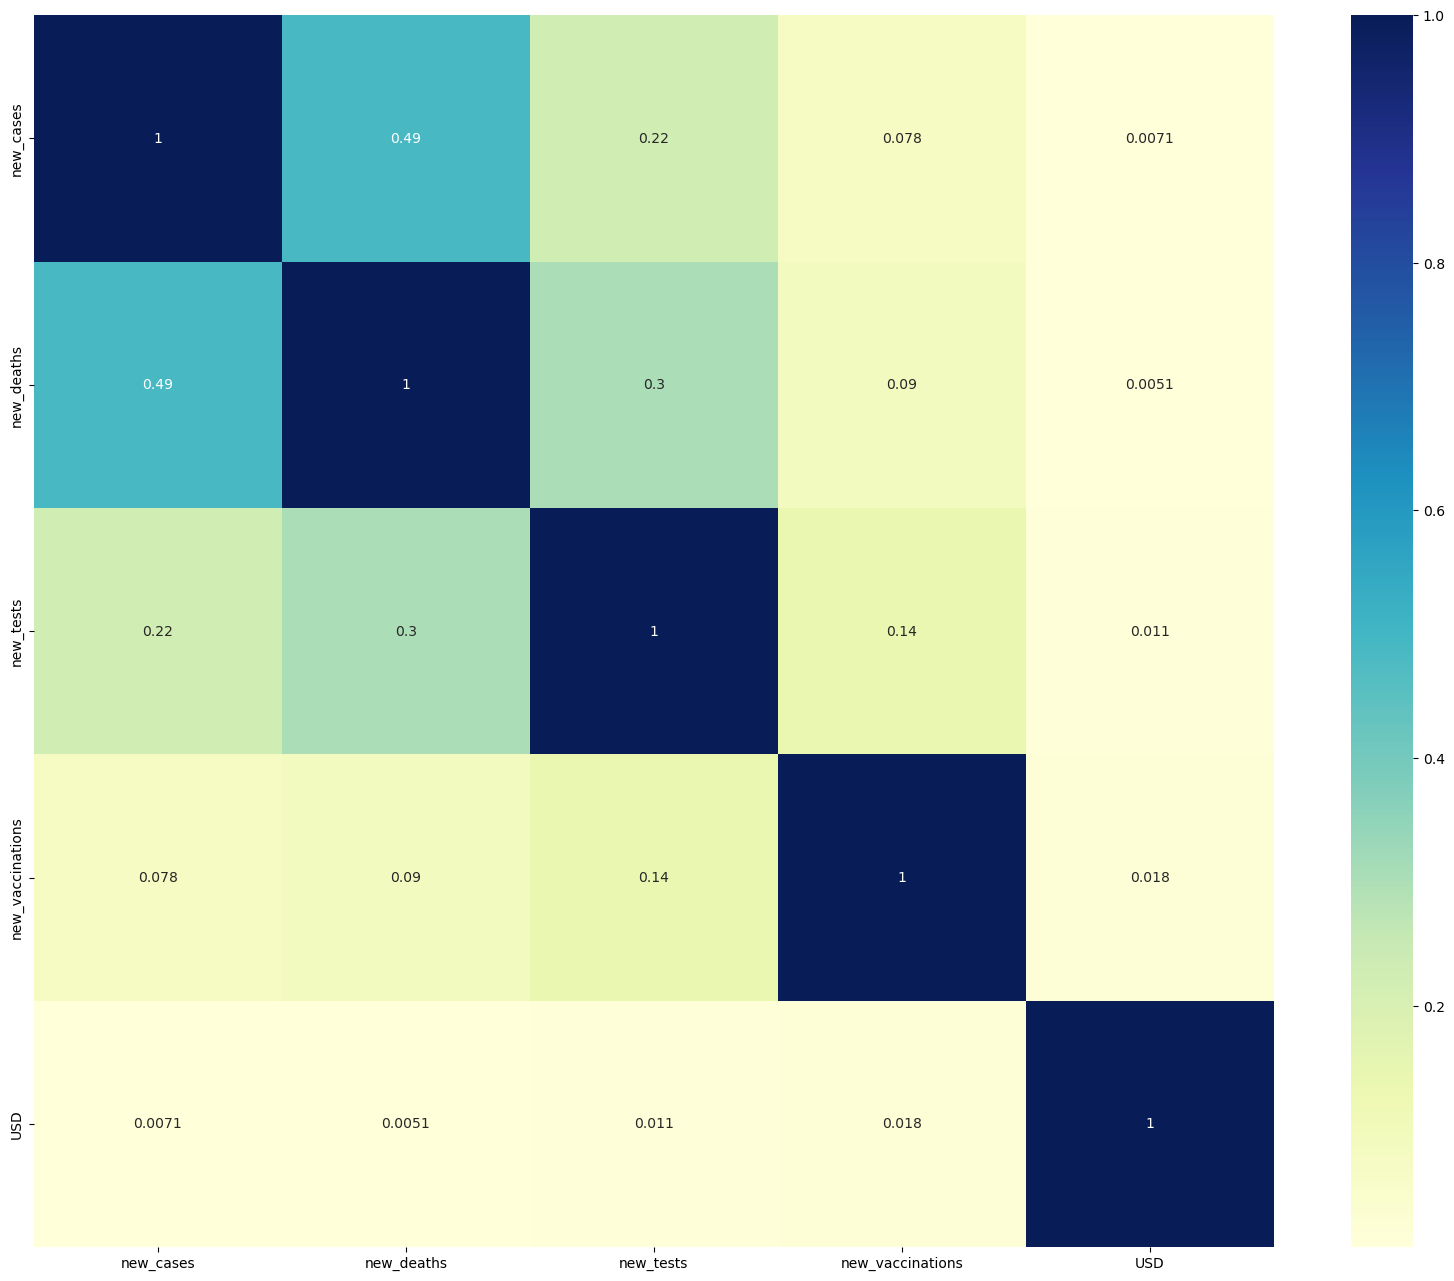

In [19]:
g20_covid_index = g20_covid_subset.merge(g20_index_subset, on='date', how='left')
f, ax1 = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(g20_covid_index.iloc[:, 1:].corr(), annot=True, cmap="YlGnBu")

In [43]:
g20_covid_canada = g20_covid_subset.loc[g20_covid_subset['location'] == "Canada"]
g20_index_canada = g20_index_data.loc[g20_index_data['Country'] == "Canada"]
g20_covid_canada['date'] =  pd.to_datetime(g20_covid_canada['date'], infer_datetime_format=True)
g20_index_canada['date'] =  pd.to_datetime(g20_index_canada['date'], infer_datetime_format=True)


,date,Country,USD
4854,2017-01-02,Canada,20933.88099
4855,2017-01-03,Canada,11459.37179
4856,2017-01-04,Canada,11561.04248
4857,2017-01-05,Canada,11720.43011
4858,2017-01-06,Canada,11713.30521
...,...,...,...
6381,2022-11-09,Canada,14419.24952
6382,2022-11-10,Canada,14778.39796
6383,2022-11-11,Canada,15086.07434
6384,2022-11-14,Canada,15086.07434


##### Correlation Heatmap for all Just Canada

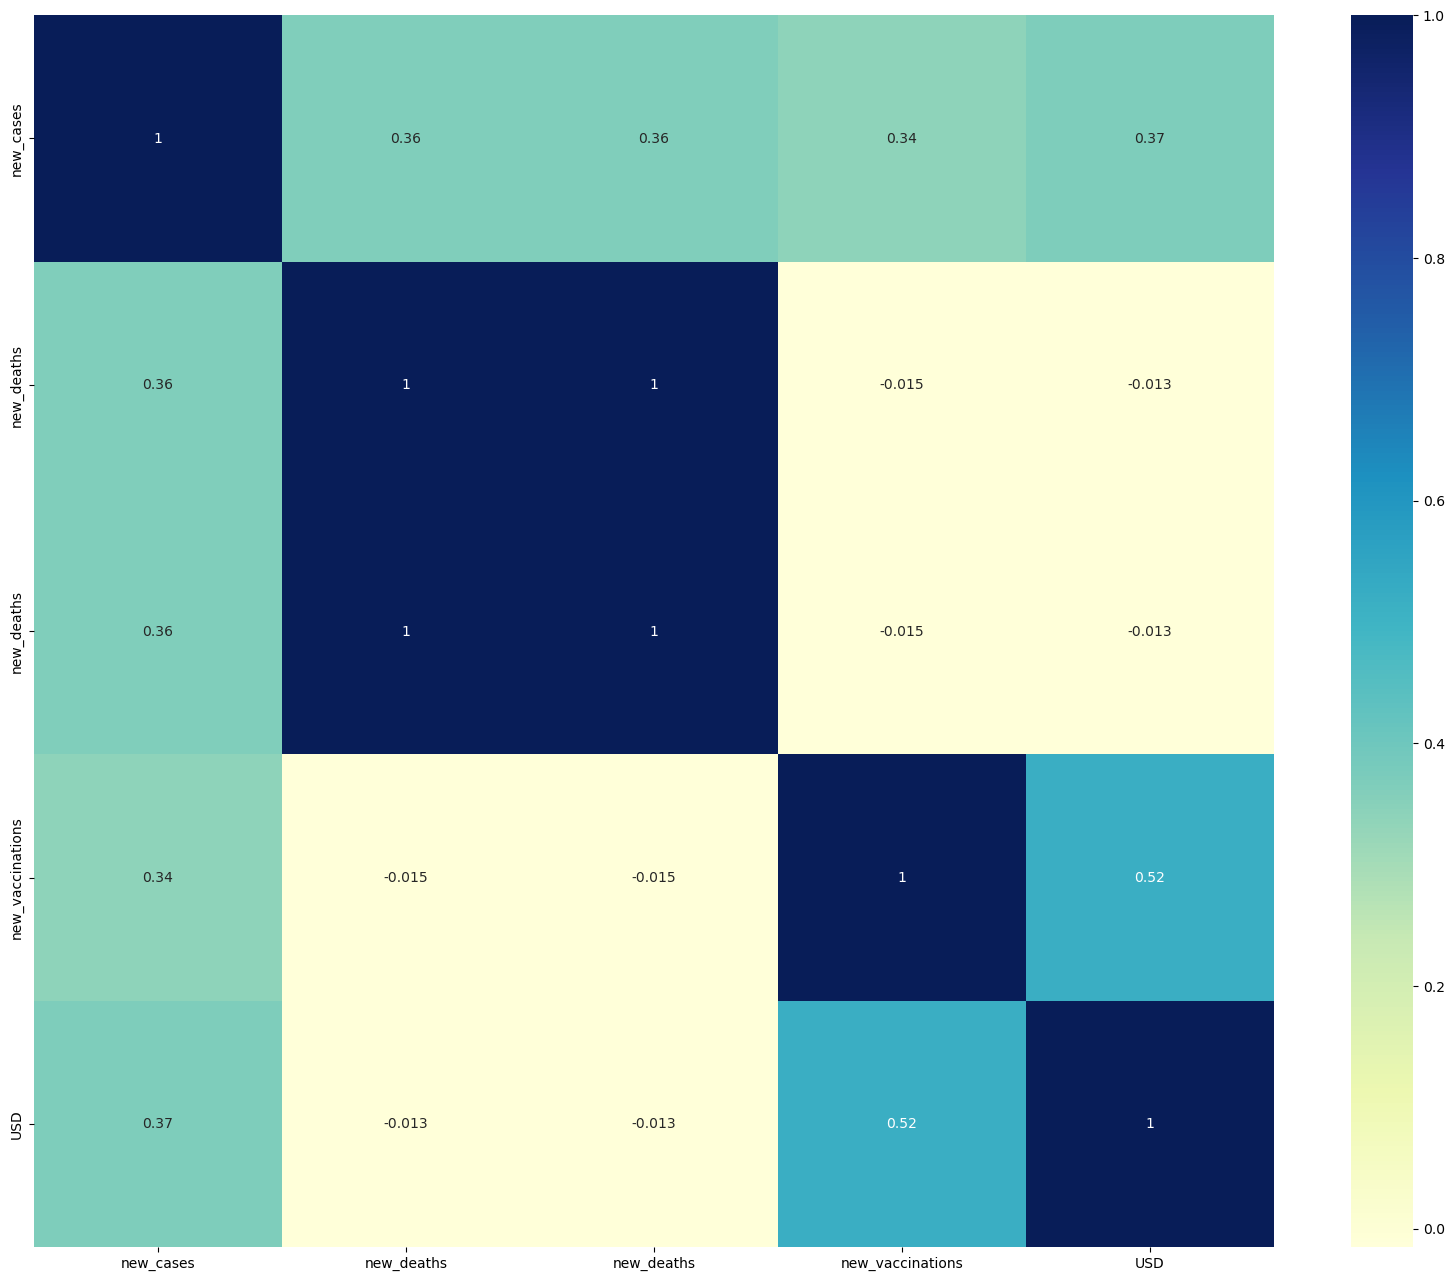

In [46]:
g20_covid_index_canada = g20_covid_canada.merge(g20_index_canada, on='date', how='left')
g20_covid_index_canada = g20_covid_index_canada[["date", "new_cases", "new_deaths", "new_tests", "new_vaccinations", "USD"]]
f, ax1 = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(g20_covid_index_canada.iloc[:, 1:].corr(), annot=True, cmap="YlGnBu")